In [2]:
import sqlite3
import pandas as pd
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pandas as pd
import plotly.graph_objects as px


In [3]:
conn=sqlite3.connect("E:\BTLTMDT\BTL_TMDT_D19\db.sqlite3")

#1.viết hàm trả về tổng số lượng hóa đơn theo ngày (từ ngày a đến ngày b)

In [55]:
def funtion1(start_date="2022-01-17", end_date="2022-04-25",conn=conn):
    query=f"SELECT * FROM 'core_order' where ordered_date>='{start_date}' and ordered_date<='{end_date}' and ordered='1' order by start_date ASC"
    df=pd.read_sql_query(query, conn)
    df['ordered_date'] = pd.to_datetime(df['ordered_date'])
    df = df.set_index('ordered_date')
    total_order = df.groupby(pd.Grouper(freq='D')).size()
    days=total_order.keys().to_list()
    count= total_order.values.tolist()
    
    for i in range(len(days)):
        days[i] = str(pd.Timestamp(days[i]))[0:10]
    return days,count


days,count=funtion1()

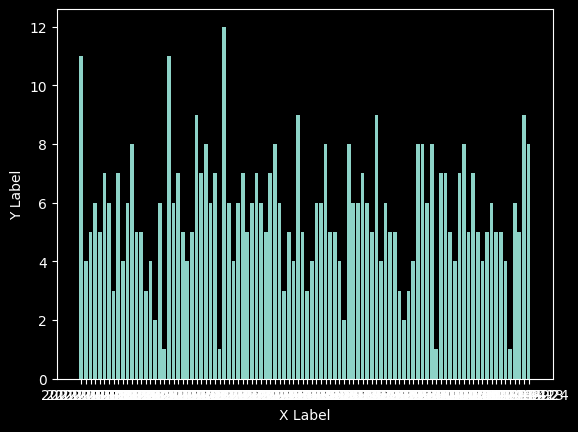

In [56]:
# Vẽ biểu đồ cột
plt.bar(days,count)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

#ham 2

In [62]:
def funtion2(year="2022",conn=conn):
    start_date=year+ "-01-01"
    end_date=year+ "-12-31"
    query=f"SELECT * FROM 'core_order' where ordered_date>='{start_date}' and ordered_date<='{end_date}' and ordered='1' order by start_date ASC"
    df=pd.read_sql_query(query, conn)
    df['ordered_date'] = pd.to_datetime(df['ordered_date'])
    
    df = df.set_index('ordered_date')
    total_order = df.groupby(pd.Grouper(freq='M')).size()
    months=total_order.keys().to_list()
    count= total_order.values.tolist()  
    my_dict= {'01': 0, '02': 0, '03': 0,  '04': 0, '05': 0, '06': 0,  '07': 0, '08': 0, '09': 0, '10': 0,'11': 0, '12': 0}
    for i in range(len(months)):
        months[i] = str(pd.Timestamp(months[i]))[5:7]
        my_dict[str(months[i] )]=count[i]
    return my_dict
my_dict=funtion2()
print(my_dict)

{'01': 106, '02': 168, '03': 162, '04': 177, '05': 192, '06': 206, '07': 217, '08': 210, '09': 164, '10': 182, '11': 177, '12': 201}


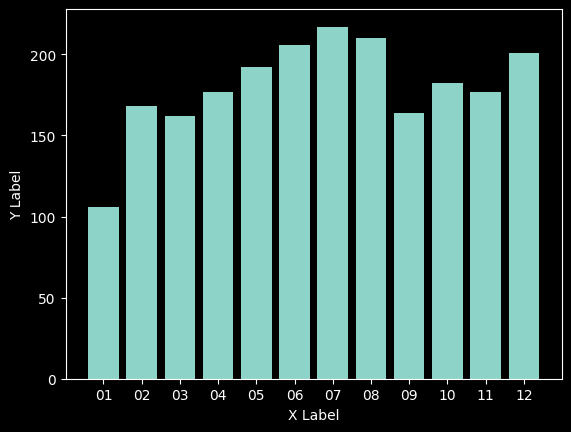

In [63]:
# Vẽ biểu đồ cột
plt.bar(my_dict.keys(),my_dict.values())
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

#funtion3

In [64]:
def funtion3(start_year="2019",end_year="2022",conn=conn):
    start_date=start_year+ "-01-01"
    end_date=end_year+ "-12-31"
    query=f"SELECT * FROM 'core_order' where ordered_date>='{start_date}' and ordered_date<='{end_date}' and ordered='1' order by start_date ASC"
    df=pd.read_sql_query(query, conn)
    df['ordered_date'] = pd.to_datetime(df['ordered_date'])
    df = df.set_index('ordered_date')
    total_order = df.groupby(pd.Grouper(freq='Y')).size()
    my_dict={}
    for i in range(int(start_year),int(end_year)): 
        my_dict[str(i)]=0
    
    years=total_order.keys().to_list()
    count= total_order.values.tolist()

    for i in range(len(years)):
        years[i] = str(pd.Timestamp(years[i]))[0:4]
        my_dict[str(years[i])] =count[i]
    return my_dict
my_dict=funtion3()

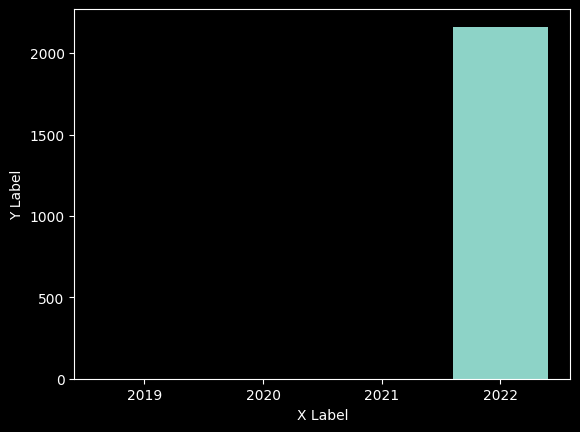

In [65]:
# Vẽ biểu đồ cột
plt.bar(my_dict.keys(),my_dict.values())
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

4.  viết hàm trả về tổng doanh thu hóa đơn theo ngày (từ ngày a đến ngày b) 
5.  viết hàm trả về tổng doanh thu hóa đơn theo 12 tháng (chọn năm) 
6.  viết hàm trả về tổng doanh thu hóa đơn theo các năm.


#ham4

In [ ]:

def funtion4(start_date="2022-00-00",end_date="2023-00-00", conn=conn,flag="D"):
  query=f"SELECT 'core_order'.'id', 'core_order'.'ordered_date','core_payment'.'amount' FROM 'core_payment', 'core_order' where 'core_order'.'payment_id'='core_payment'.'id' and 'core_order'.'ordered'=1 and 'core_order'.'ordered_date'>='{start_date}' and 'core_order'.'ordered_date'<='{end_date}' order by start_date ASC"
  

In [29]:

def funtion4(start_date="2022-00-00",end_date="2023-00-00", conn=conn,flag='D'):
  query=f"SELECT 'core_order'.'id', 'core_order'.'ordered_date','core_payment'.'amount' FROM 'core_payment', 'core_order' where 'core_order'.'payment_id'='core_payment'.'id' and 'core_order'.'ordered'=1 and 'core_order'.'ordered_date'>='{start_date}' and 'core_order'.'ordered_date'<='{end_date}' order by start_date ASC"
  df=pd.read_sql_query(query, conn)
  # Chuyển đổi trường 'start_date' sang kiểu datetime
  df['ordered_date'] = pd.to_datetime(df['ordered_date'])
  if flag=='D' or flag=='d':
    df['date']=df['ordered_date'].dt.date
    time_amount = df.groupby('date')['amount'].sum()
  days=time_amount.keys().to_list()
  amount= time_amount.values.tolist()
  for i in range(len(days)):
        days[i] = str(days[i])
  
  print(type(time_amount))
  print(days,amount)
  return days,amount

funtion4()

<class 'pandas.core.series.Series'>
['2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22

(['2022-01-13',
  '2022-01-14',
  '2022-01-15',
  '2022-01-16',
  '2022-01-17',
  '2022-01-18',
  '2022-01-19',
  '2022-01-20',
  '2022-01-21',
  '2022-01-22',
  '2022-01-23',
  '2022-01-24',
  '2022-01-25',
  '2022-01-26',
  '2022-01-27',
  '2022-01-28',
  '2022-01-29',
  '2022-01-30',
  '2022-01-31',
  '2022-02-01',
  '2022-02-02',
  '2022-02-03',
  '2022-02-04',
  '2022-02-05',
  '2022-02-06',
  '2022-02-07',
  '2022-02-08',
  '2022-02-09',
  '2022-02-10',
  '2022-02-11',
  '2022-02-12',
  '2022-02-13',
  '2022-02-14',
  '2022-02-15',
  '2022-02-16',
  '2022-02-17',
  '2022-02-18',
  '2022-02-19',
  '2022-02-20',
  '2022-02-21',
  '2022-02-22',
  '2022-02-23',
  '2022-02-24',
  '2022-02-25',
  '2022-02-26',
  '2022-02-27',
  '2022-02-28',
  '2022-03-01',
  '2022-03-02',
  '2022-03-03',
  '2022-03-04',
  '2022-03-05',
  '2022-03-06',
  '2022-03-07',
  '2022-03-08',
  '2022-03-09',
  '2022-03-10',
  '2022-03-11',
  '2022-03-12',
  '2022-03-13',
  '2022-03-14',
  '2022-03-15',
  '2022-

#ham5

In [38]:

def funtion5(year="2022", conn=conn,flag='M'):
  start_date=year+"-01-01"
  end_date=year+"-12-31"
  query=f"SELECT 'core_order'.'id', 'core_order'.'ordered_date','core_payment'.'amount' FROM 'core_payment', 'core_order' where 'core_order'.'payment_id'='core_payment'.'id' and 'core_order'.'ordered'=1 and 'core_order'.'ordered_date'>='{start_date}' and 'core_order'.'ordered_date'<='{end_date}' order by start_date ASC"
  df=pd.read_sql_query(query, conn)
  # Chuyển đổi trường 'start_date' sang kiểu datetime
  df['ordered_date'] = pd.to_datetime(df['ordered_date'])

  df['month']=df['ordered_date'].dt.month
  time_amount = df.groupby('month')['amount'].sum()

  months=time_amount.keys().to_list()
  amount= time_amount.values.tolist()
  # months=total_order.keys().to_list()
  # count= total_order.values.tolist()  
  my_dict= {'1': 0, '2': 0, '3': 0,  '4': 0, '5': 0, '6': 0,  '7': 0, '8': 0, '9': 0, '10': 0,'11': 0, '12': 0}
  for i in range(len(months)):
      months[i] = str(months[i])
      my_dict[str(months[i])]=amount[i]
  return my_dict

funtion5()

{'1': 290500000.0,
 '2': 458800000.0,
 '3': 443900000.0,
 '4': 479800000.0,
 '5': 531100000.0,
 '6': 551900000.0,
 '7': 604000000.0,
 '8': 573400000.0,
 '9': 461100000.0,
 '10': 499100000.0,
 '11': 494800000.0,
 '12': 558600000.0}

#funtion6

In [42]:

def funtion6(start_year="2021",end_year="2027", conn=conn):
  start_date=start_year+"-01-01"
  end_date=end_year+"-12-31"
  query=f"SELECT 'core_order'.'id', 'core_order'.'ordered_date','core_payment'.'amount' FROM 'core_payment', 'core_order' where 'core_order'.'payment_id'='core_payment'.'id' and 'core_order'.'ordered'=1 and 'core_order'.'ordered_date'>='{start_date}' and 'core_order'.'ordered_date'<='{end_date}' order by start_date ASC"
  
  df=pd.read_sql_query(query, conn)
  # Chuyển đổi trường 'start_date' sang kiểu datetime
  df['ordered_date'] = pd.to_datetime(df['ordered_date'])
  df['year'] = df['ordered_date'].dt.year
  time_amount = df.groupby('year')['amount'].sum()
  
  my_dict={}
  for i in range(int(start_year),int(end_year)): 
      my_dict[str(i)]=0
  years=time_amount.keys().to_list()
  amount= time_amount.values.tolist()
  

  for i in range(len(years)):
      years[i] = str(years[i])
      my_dict[str(years[i])] =amount[i]
 
  return my_dict

funtion6()

{'2021': 0,
 '2022': 5967600000.0,
 '2023': 1673300000.0,
 '2024': 0,
 '2025': 0,
 '2026': 0}

#funtion7